In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Load the dataset
file_path = "/content/Twitter_Sentiment_Dataset.csv"
df = pd.read_csv(file_path)

# Handling Duplicate Data

In [29]:
# Convert lists to strings (if necessary)
for column in df.columns:
    if df[column].dtype == 'object':
        # Check if column contains lists
        if df[column].apply(lambda x: isinstance(x, list)).any():
            df[column] = df[column].apply(str)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f'Total duplicate rows: {duplicate_rows.shape[0]}')


# Remove duplicate rows
df = df.drop_duplicates()

Total duplicate rows: 2701


In [30]:
# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 71981 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       71981 non-null  int64 
 1   Entity         71981 non-null  object
 2   Sentiment      71981 non-null  object
 3   Tweet Content  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


(None,
    Tweet ID       Entity Sentiment  \
 0      2401  Borderlands  Positive   
 1      2401  Borderlands  Positive   
 2      2401  Borderlands  Positive   
 3      2401  Borderlands  Positive   
 4      2401  Borderlands  Positive   
 
                                        Tweet Content  
 0  im getting on borderlands and i will murder yo...  
 1  I am coming to the borders and I will kill you...  
 2  im getting on borderlands and i will kill you ...  
 3  im coming on borderlands and i will murder you...  
 4  im getting on borderlands 2 and i will murder ...  )

# Exploratory Data Analysis

## Plot the distribution of sentiments :

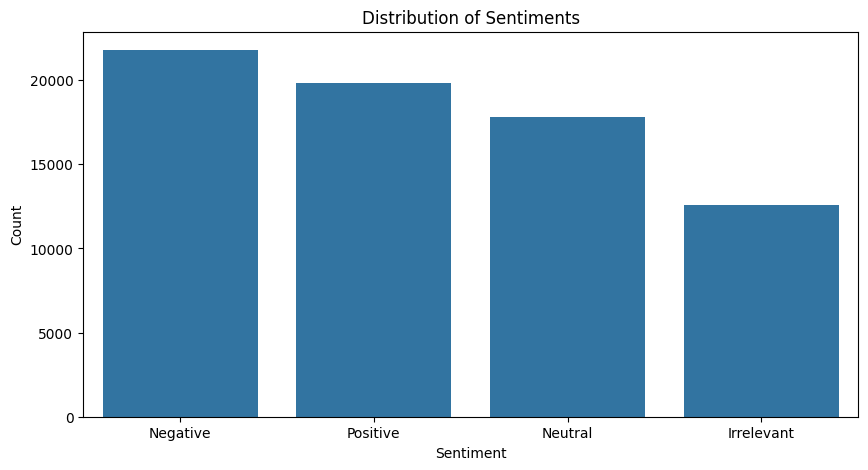

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Top entities for positive sentiment :

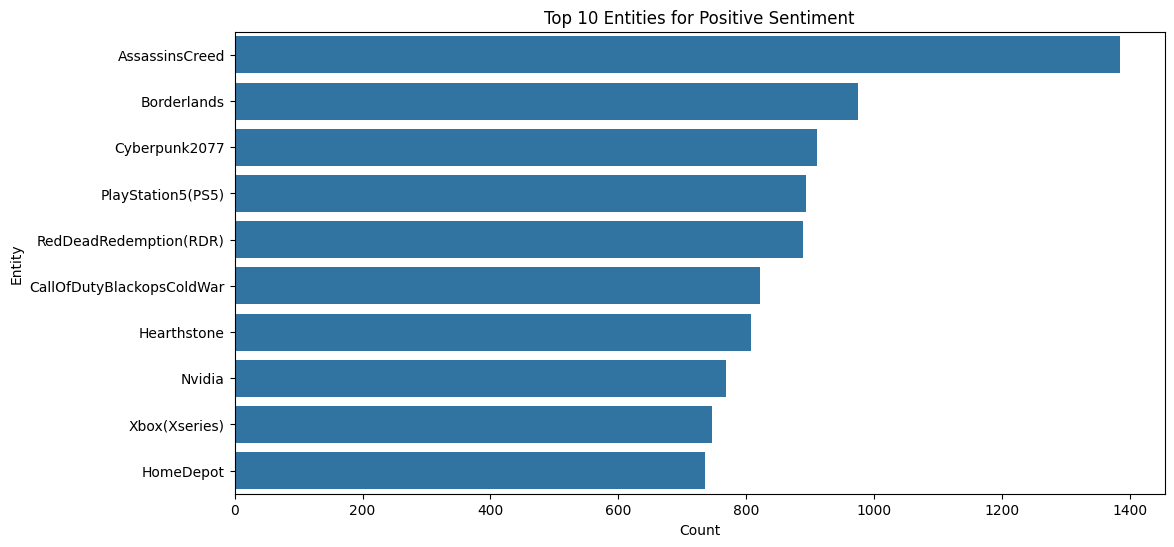

In [52]:
plt.figure(figsize=(12, 6))
entity_counts = df[df['Sentiment'] == 'Positive']['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.values, y=entity_counts.index)
plt.title('Top 10 Entities for Positive Sentiment')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

## Top entities for negative sentiment :

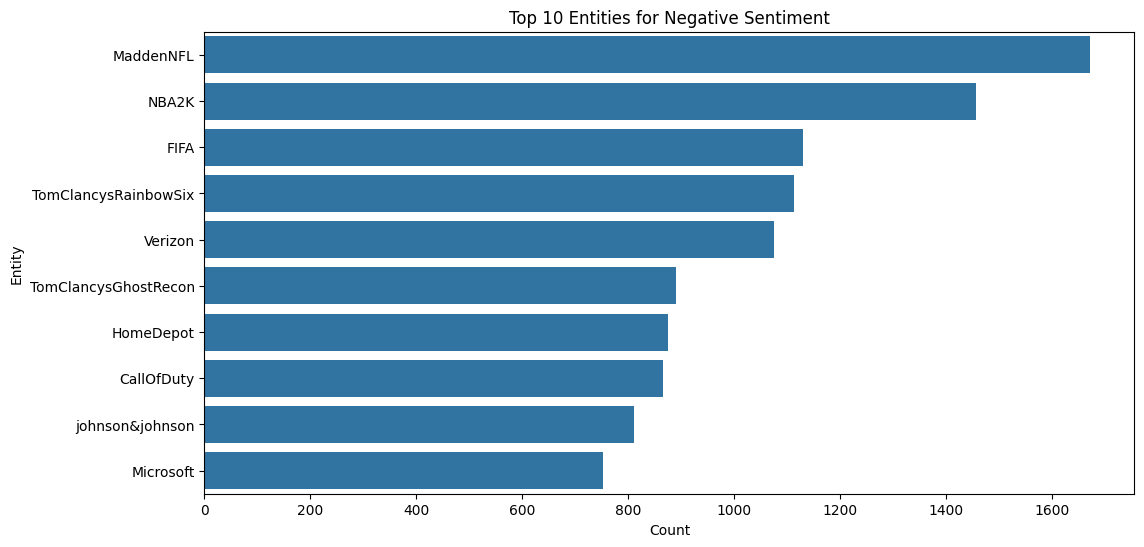

In [50]:
plt.figure(figsize=(12, 6))
entity_counts = df[df['Sentiment'] == 'Negative']['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.values, y=entity_counts.index)
plt.title('Top 10 Entities for Negative Sentiment')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

## Top entities for neutral sentiment :

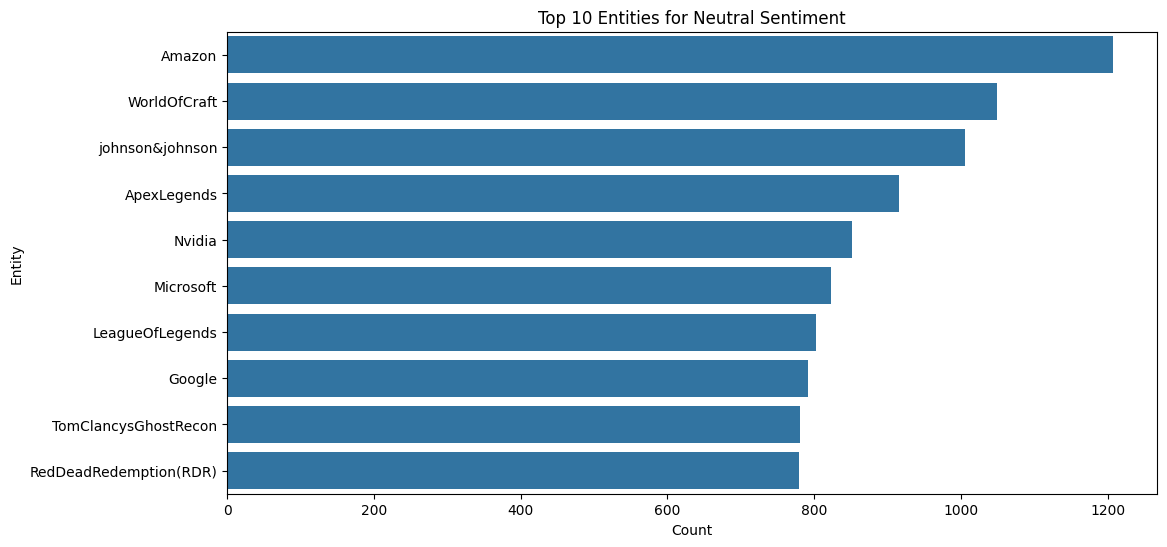

In [55]:
plt.figure(figsize=(12, 6))
entity_counts = df[df['Sentiment'] == 'Neutral']['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.values, y=entity_counts.index)
plt.title('Top 10 Entities for Neutral Sentiment')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

## Top entities for irrelevant sentiment :

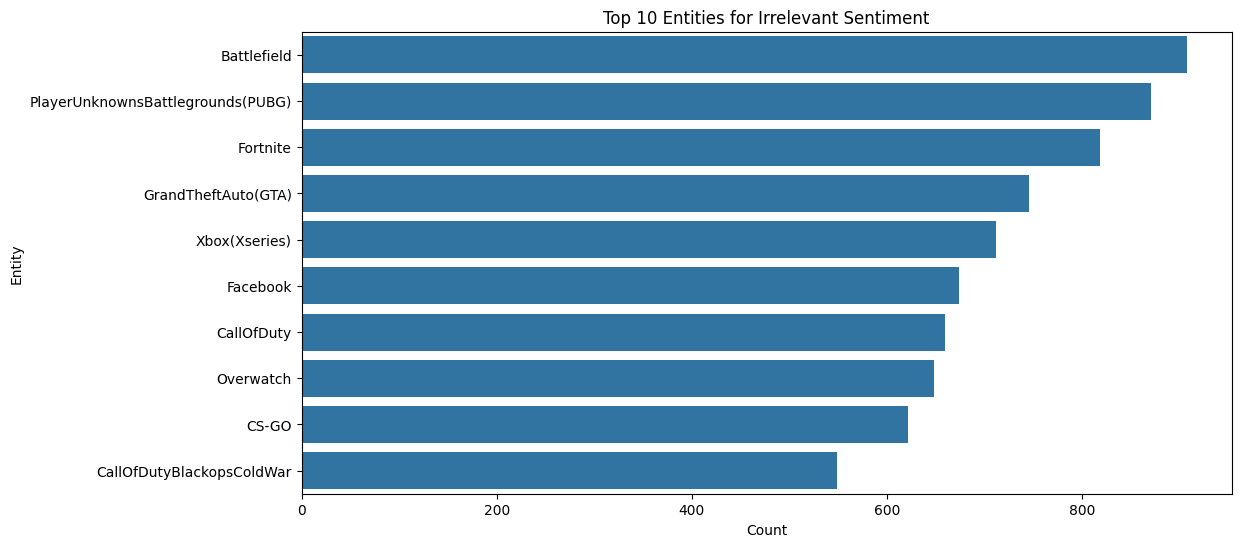

In [54]:
plt.figure(figsize=(12, 6))
entity_counts = df[df['Sentiment'] == 'Irrelevant']['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.values, y=entity_counts.index)
plt.title('Top 10 Entities for Irrelevant Sentiment')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

## Word cloud for positive sentiment tweets :

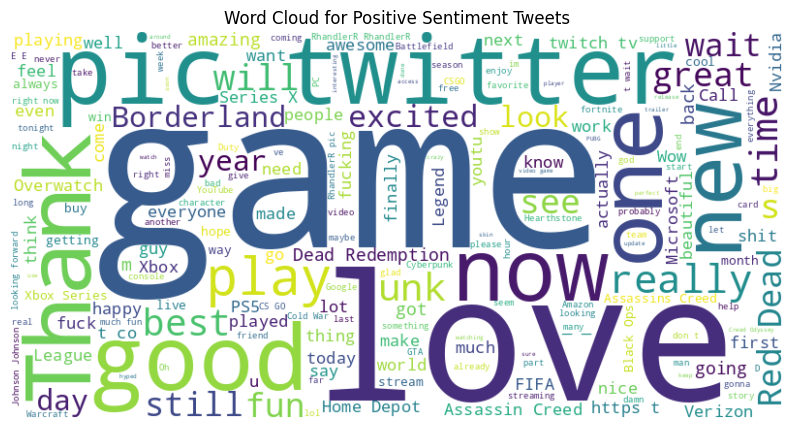

In [56]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment tweets
positive_tweets = df[df['Sentiment'] == 'Positive']['Tweet Content'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Tweets')
plt.show()

## Most Common Words in Tweets :

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


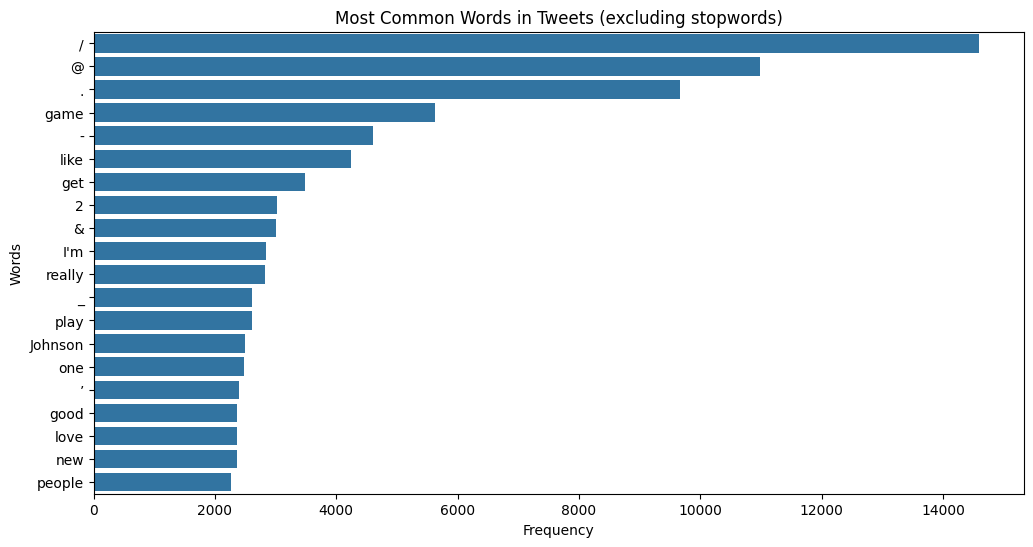

In [34]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Most Common Words in Tweets (excluding stopwords)
all_tweets = df['Tweet Content'].dropna().str.cat(sep=' ')
all_words = all_tweets.split()
filtered_words = [word for word in all_words if word.lower() not in stop_words]

word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Common Words in Tweets (excluding stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## Average Tweet Length by Sentiment :

<ipython-input-43-4c3462cd3f64>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tweet Length'] = df_cleaned['Tweet Content'].apply(lambda x: len(str(x)))


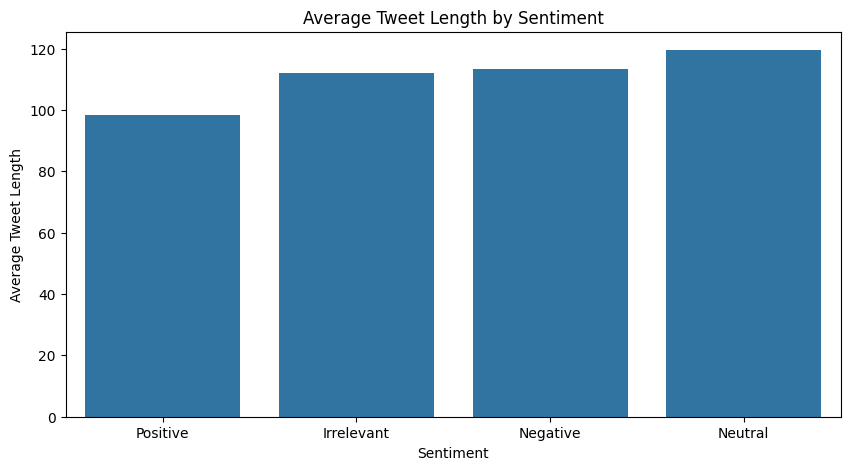

In [43]:
# Convert lists to strings (if necessary)
for column in df.columns:
    if df[column].dtype == 'object':
        # Check if column contains lists
        if df[column].apply(lambda x: isinstance(x, list)).any():
            df[column] = df[column].apply(str)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Ensure that 'Tweet Content' column has no missing values
df_cleaned = df_cleaned.dropna(subset=['Tweet Content'])

# Calculate tweet length
df_cleaned['Tweet Length'] = df_cleaned['Tweet Content'].apply(lambda x: len(str(x)))

# Calculate average tweet length by sentiment
avg_tweet_length = df_cleaned.groupby('Sentiment')['Tweet Length'].mean().sort_values()

# Plot the average tweet length by sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_tweet_length.index, y=avg_tweet_length.values)
plt.title('Average Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Tweet Length')
plt.show()